In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

# Dataset

In [8]:
data = load_breast_cancer()
X, y = data.data, data.target

y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5
)

# Adaboost

## Decision Stump

In [16]:
class DecisionStump: 
    def __init__(self):
        self.feature_idx = None
        self.threshold = None
        self.polarity = 1
        self.alpha = None
    
    def predict(self,X):
        n_samples = X.shape[0]
        feature = X[:,self.feature_idx]
        preds = np.ones(n_samples)
        if self.polarity == 1:
            preds[feature<self.threshold] = -1
        else:
            preds[feature>=self.threshold] = -1
        return preds

## Adaboost Class

In [65]:
class AdaBoost:
    def __init__(self,n_clfs=5):
        self.n_clfs = n_clfs
    
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.clfs = []
        self.weights = np.full(n_samples,fill_value=1/n_samples)
        for _ in range(self.n_clfs):
            curr_clf = DecisionStump()
            min_error = float("inf")
            for feature_i in range(n_features):
                curr_feature = X[:,feature_i]
                thresholds = np.unique(curr_feature)
                for threshold in thresholds:
                    p=1
                    curr_preds = np.ones(n_samples)
                    curr_preds[curr_feature<threshold] = -1
                    misclassified = y!=curr_preds
                    error = np.sum(self.weights*misclassified)
                    if error>0.5:
                        error = 1-error
                        p = -1
                    
                    if error<min_error:
                        min_error=error
                        curr_clf.threshold = threshold
                        curr_clf.feature_idx = feature_i
                        curr_clf.polarity = p
            eps = 1e-10
            curr_clf.alpha = 0.5*np.log((1-min_error+eps)/(min_error+eps))
            preds = curr_clf.predict(X)
            self.weights *= np.exp(-curr_clf.alpha*y*preds)
            self.weights /= np.sum(self.weights)
            self.clfs.append(curr_clf)
    def predict(self,X):
        all_preds = np.zeros(shape=(self.n_clfs,X.shape[0]))
        for i,clf in enumerate(self.clfs):
            all_preds[i] = clf.alpha*clf.predict(X)
        sum_preds = np.sum(all_preds,axis=0)
        return np.sign(sum_preds)
        

In [66]:
def accuracy(y_true,y_pred):
    return np.sum(y_true==y_pred)/len(y_true)

In [73]:
my_ab = AdaBoost(n_clfs=4)
my_ab.fit(X_train,y_train)

In [74]:
y_pred = my_ab.predict(X_test)

In [75]:
accuracy(y_test,y_pred)

0.956140350877193

In [ ]:
n_clfs = [4,5,6,7,8,9,10,11,12]
accuracy_scores = []
for n in n_clfs:
    ab = AdaBoost(n_clfs=n)
    ab.fit(X_train,y_train)
    preds = ab.predict(X_test)
    accuracy_scores.append(accuracy(y_test,preds))

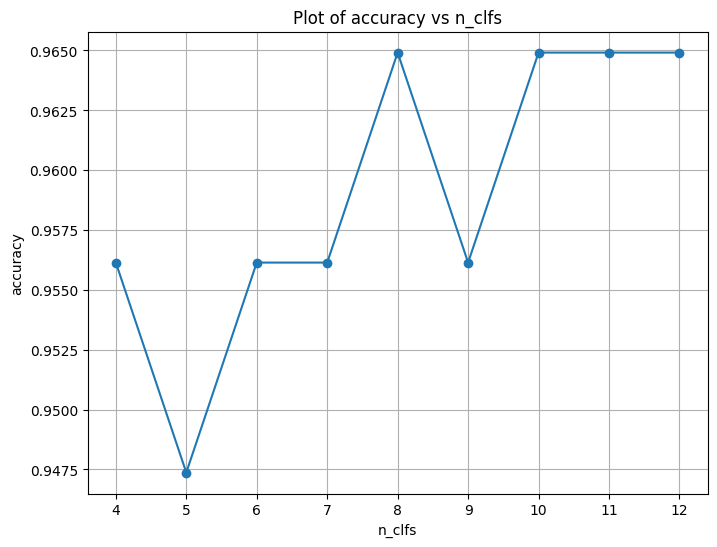

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(n_clfs, accuracy_scores, marker='o')  # 'o' marker to show the individual data points
plt.title("Plot of accuracy vs n_clfs")
plt.xlabel("n_clfs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

It appears that 8 is least best number of n_clfs (to prevent overfitting)

# Sklearn

In [64]:
sklearn_ab = AdaBoostClassifier(n_estimators=4)
sklearn_ab.fit(X_train,y_train)
sklearn_ab.predict(X_test)
sklearn_ab.score(X_test,y_test)

0.9649122807017544